In [7]:
import sys
sys.path.append("../")
from scripts.experience_analytics import aggregate_information, compute_list_values, compute_report, perform_clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing all necessary functions


In [10]:

df = pd.read_csv("../results/cleaned_data.csv")

avg_tcp_retransmission, avg_rtt, handset_type, avg_throughput = aggregate_information(df)
top_10_tcp_values, bottom_10_tcp_values, most_frequent_tcp_values, \
top_10_rtt_values, bottom_10_rtt_values, most_frequent_rtt_values, \
top_10_throughput_values, bottom_10_throughput_values, most_frequent_throughput_values = compute_list_values(df)
avg_throughput_per_handset_type, avg_tcp_retransmission_per_handset_type = compute_report(df)
clustered_df = perform_clustering(df)

In [12]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


<h1>Histogram of Average Throughput per Handset Type</h1>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


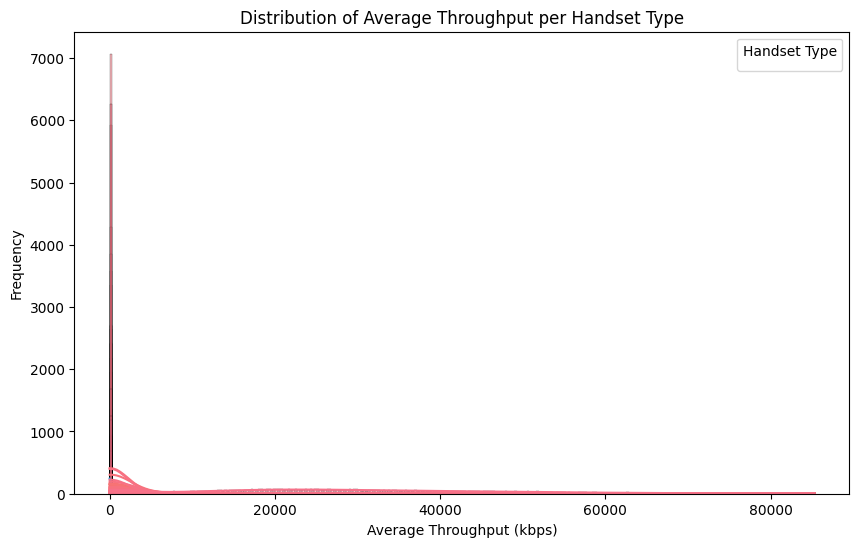

In [13]:
# Plot histogram of average throughput per handset type
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Avg Bearer TP DL (kbps)', hue='Handset Type', kde=True)
plt.title('Distribution of Average Throughput per Handset Type')
plt.xlabel('Average Throughput (kbps)')
plt.ylabel('Frequency')
plt.legend(title='Handset Type', loc='upper right')
plt.show()


<h1>Bar Plot of Average TCP Retransmission per Handset Type</h1>

C:\Users\dell\AppData\Local\Temp\ipykernel_7980\986737910.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Handset Type', y='TCP DL Retrans. Vol (Bytes)', ci=None)


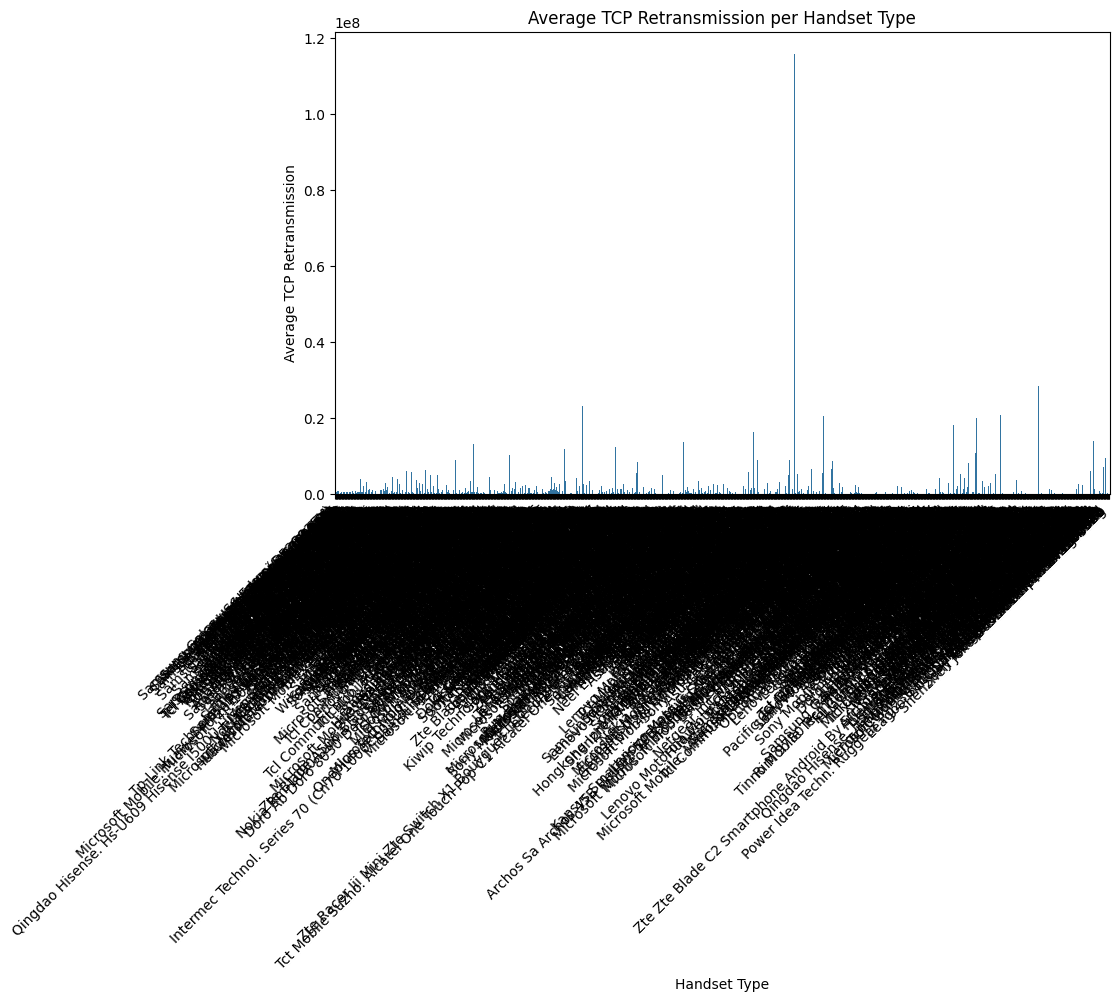

In [15]:
# Plot bar plot of average TCP retransmission per handset type
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Handset Type', y='TCP DL Retrans. Vol (Bytes)', ci=None)
plt.title('Average TCP Retransmission per Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Average TCP Retransmission')
plt.xticks(rotation=45, ha='right')
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_7980\359252561.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Handset Type', y='TCP DL Retrans. Vol (Bytes)', ci=None)


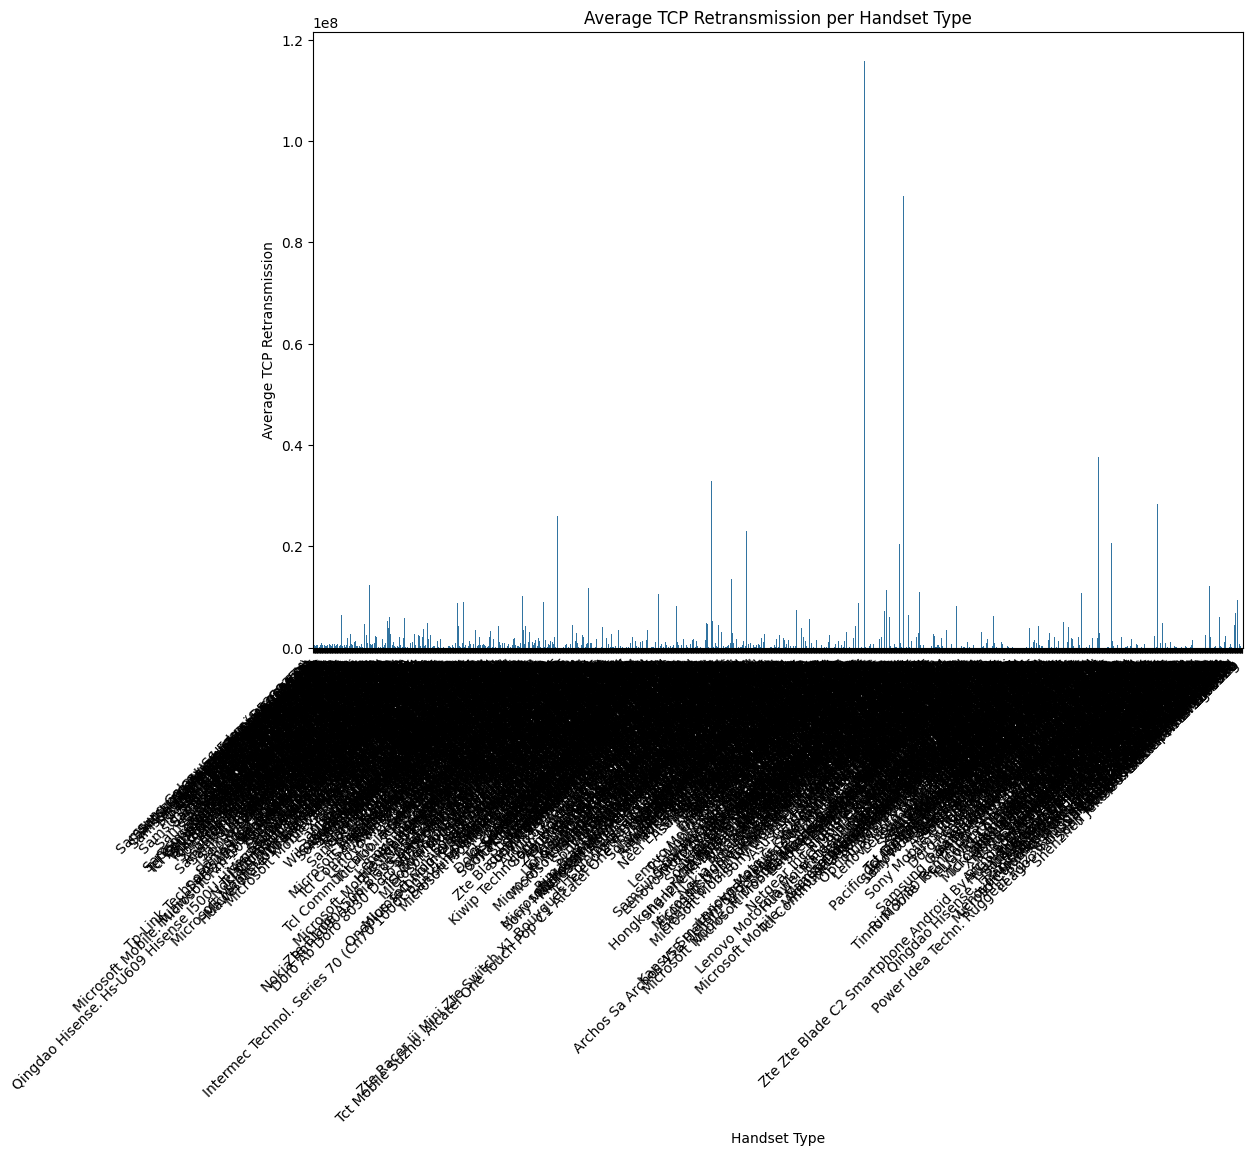

In [19]:
# Plot bar plot of average TCP retransmission per handset type
plt.figure(figsize=(12, 8))  # Increase the figure size for better visibility
sns.barplot(data=df, x='Handset Type', y='TCP DL Retrans. Vol (Bytes)', ci=None)
plt.title('Average TCP Retransmission per Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Average TCP Retransmission')
plt.xticks(rotation=45, ha='right')
plt.show()


<h1>Scatter Plot of Clusters Based on Experience Metrics</h1>

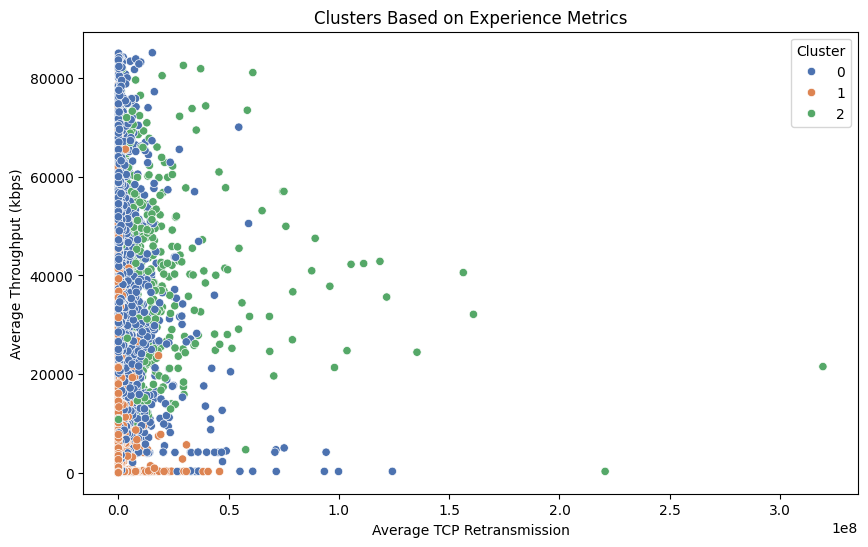

In [17]:
# Plot scatter plot of clusters based on experience metrics
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clustered_df, x='TCP DL Retrans. Vol (Bytes)', y='Avg Bearer TP DL (kbps)', hue='Cluster', palette='deep')
plt.title('Clusters Based on Experience Metrics')
plt.xlabel('Average TCP Retransmission')
plt.ylabel('Average Throughput (kbps)')
plt.legend(title='Cluster', loc='upper right')
plt.show()
